In [34]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.font_manager as fm
%config InlineBackend.figure_format = 'retina'

 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [35]:
seoul = pd.read_excel("서울 확진자 정보 200729.xlsx", index_col="연번")
seoul

,Unnamed: 0,환자,확진일자,거주지,여행력,접촉력,조치사항
연번,,,,,,,
1589,0,14240,7.28.,송파구,-,송파구 확진자 접촉,서남병원
1588,1,14249,7.28.,강북구,-,강북구 확진자 접촉,서울의료원
1587,2,14241,7.28.,마포구,러시아,해외 접촉 추정,생활치료센터
1586,3,14235,7.28.,영등포구,-,종로구 지인모임,서북병원
1585,4,14230,7.28.,송파구,-,확인 중,삼성서울병원
...,...,...,...,...,...,...,...
5,1584,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
4,1585,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
3,1586,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)


In [36]:
seoul = seoul.drop('Unnamed: 0', axis=1)

In [37]:
seoul

,환자,확진일자,거주지,여행력,접촉력,조치사항
연번,,,,,,
1589,14240,7.28.,송파구,-,송파구 확진자 접촉,서남병원
1588,14249,7.28.,강북구,-,강북구 확진자 접촉,서울의료원
1587,14241,7.28.,마포구,러시아,해외 접촉 추정,생활치료센터
1586,14235,7.28.,영등포구,-,종로구 지인모임,서북병원
1585,14230,7.28.,송파구,-,확인 중,삼성서울병원
...,...,...,...,...,...,...
5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)


In [38]:
seoul_overseas = seoul[seoul["접촉력"].str.contains('해외') == True]

In [39]:
seoul_overseas

,환자,확진일자,거주지,여행력,접촉력,조치사항
연번,,,,,,
1587,14241,7.28.,마포구,러시아,해외 접촉 추정,생활치료센터
1582,14226,7.28.,성북구,미국,해외 접촉 추정,보라매병원
1579,14202,7.27.,용인시,멕시코,해외 접촉 추정,서울의료원
1578,14200,7.27.,기타,키르기스스탄,해외 접촉 추정,보라매병원
1576,14188,7.27.,마포구,"모로코, 터키",해외 접촉 추정,서남병원
...,...,...,...,...,...,...
9,19,2.5.,송파구,싱가포르,해외 접촉,서울의료원(퇴원)
8,13,2.2.,인천시,우한 교민,해외 접촉,국립중앙의료원(퇴원)
4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [40]:
city = seoul_overseas.groupby('여행력').count()
city = city.sort_values(by='환자', ascending=False)
city.head(20)

,환자,확진일자,거주지,접촉력,조치사항
여행력,,,,,
미국,128,128,128,128,128
영국,47,47,47,47,47
필리핀,19,19,19,19,19
스페인,10,10,10,10,10
프랑스,10,10,10,10,10
이라크,9,9,9,9,9
카자흐스탄,7,7,7,7,7
태국,6,6,6,6,6
일본,6,6,6,6,6


In [41]:
seoul_count = seoul_overseas.groupby('거주지').count()

In [42]:
seoul_count = seoul_count.drop(['고양시', '국외거주', '기타', '대전시', '미국', '성남시', '남양주'])
seoul_count = seoul_count.drop(['스페인', '아산시','인천시','재외국민','천안시','파주시','화성시','용인시'])

In [43]:
seoul_count = seoul_count.drop(['확진일자','여행력','접촉력','조치사항'], axis = 1)
seoul_count = seoul_count.sort_index()
seoul_count.columns = ['해외유입 수']
seoul_count.index.names = ['행정구역']

In [44]:
df = pd.read_excel("서울 시군구 근로소득 주민등록인구.xlsx")

In [45]:
df['일인당 소득(백만원)'] = (df['금액 (백만원)']/df['인원 (명)'])

In [46]:
seoul = pd.merge(seoul_count, df, on='행정구역')

In [63]:
seoul_sort = seoul.sort_values(by='해외유입 수', ascending=False)
seoul_sort

,행정구역,해외유입 수,인원 (명),금액 (백만원),일인당 소득(백만원)
0,강남구,41,206821,14403588,69.642773
14,서초구,28,167636,11569227,69.013977
17,송파구,24,276658,13537820,48.933412
12,마포구,22,152162,6814638,44.785413
13,서대문구,19,115417,4555667,39.471369
20,용산구,18,89183,5248094,58.846350
1,강동구,16,165248,6291291,38.071813
15,성동구,16,116973,5203765,44.486890
11,동작구,14,160341,6371673,39.738264
4,관악구,13,212016,6521099,30.757580


In [56]:
seoul.corr()

,해외유입 수,인원 (명),금액 (백만원),일인당 소득(백만원)
해외유입 수,1.000000,0.404713,0.781814,0.791109
인원 (명),0.404713,1.000000,0.807662,0.088868
금액 (백만원),0.781814,0.807662,1.000000,0.636385
일인당 소득(백만원),0.791109,0.088868,0.636385,1.000000


해외유입 수와 일인당 소득은 약 0.79로 매우 유의미한 상관관계를 가진다. 이 분석을 하기전에 분명 선행 분석이 있을 거라 생각하여 찾아본 결과 [https://newfront.dacon.io/codeshare/1081] 에서 5월경에 분석을 했다. 거기서는 약 0.38의 결과가 나왔지만, 현재 7/29일 기준으로 0.79의 상관계수를 보여준다.

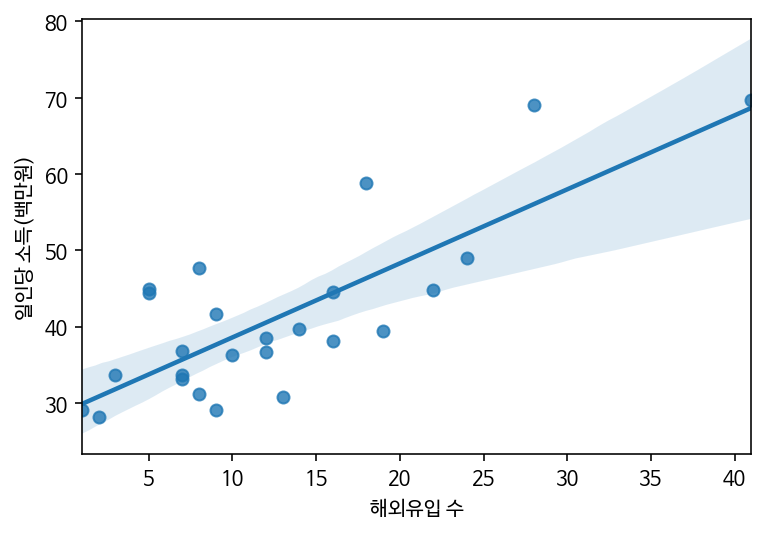

In [62]:
sns.regplot(seoul_sort['해외유입 수'],seoul_sort['일인당 소득(백만원)'])